In [10]:
import importlib
import tensorflow as tf
import Dynamic_Causal_Graph as DCG
importlib.reload(DCG)

<module 'Dynamic_Causal_Graph' from 'C:\\Users\\user\\Desktop\\Dynamic-Causal-Graph-Analysis\\Analyze_Causal_Graph\\Dynamic_Causal_Graph.py'>

## Problem setup

Created grid for exploration set ('X',): shape (100, 1)
Created grid for exploration set ('Z',): shape (100, 1)
Created grid for exploration set ('X', 'Z'): shape (10000, 2)


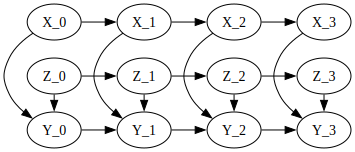

In [2]:
T = 4 # In this example, as in the paper, we consider three time-slices
init_sem, sem, dag_view, G, exploration_sets, intervention_domain, true_objective_values  = DCG.setup_ind_scm(T)
dag_view

In [11]:
print(dag_view)

digraph { rankdir=LR; X_0 -> Y_0; Z_0 -> Y_0; X_1 -> Y_1; Z_1 -> Y_1; X_2 -> Y_2; Z_2 -> Y_2; X_3 -> Y_3; Z_3 -> Y_3; X_0 -> X_1; Z_0 -> Z_1; Y_0 -> Y_1; X_1 -> X_2; Z_1 -> Z_2; Y_1 -> Y_2; X_2 -> X_3; Z_2 -> Z_3; Y_2 -> Y_3; { rank=same; X_0 Z_0 Y_0 } { rank=same; X_1 Z_1 Y_1 } { rank=same; X_2 Z_2 Y_2 } { rank=same; X_3 Z_3 Y_3 } }



In [12]:
exploration_sets = [('X',), ('Z',), ('X', 'Z')]
intervention_domain = {'X': [-4, 1], 'Z': [-3, 3]}


# Contains the exploration sets we will be investigating
print("Exploration sets:", exploration_sets)

# The intervention domains for the manipulative variables
print("Intervention domains:", intervention_domain)

# The true outcome values of Y given an optimal intervention on the three time-slices
formatted_outcomes = [
    f"y^*_{t} = {tf.round(val * 1000) / 1000:.3f}" for t, val in enumerate(true_objective_values)
]
print("True optimal outcome values:", formatted_outcomes)

# Number of trials
N = 10
print("Number of trials:", N)


Exploration sets: [('X',), ('Z',), ('X', 'Z')]
Intervention domains: {'X': [-4, 1], 'Z': [-3, 3]}
True optimal outcome values: ['y^*_0 = -2.007', 'y^*_1 = -4.013', 'y^*_2 = -6.020', 'y^*_3 = -8.027']
Number of trials: 10


#### 15 Nodes Causal graph 7manipulable, 7nonmanipulable and 1 target variable

Created grid for exploration set ('X',): shape (100, 1)
Created grid for exploration set ('Z',): shape (100, 1)
Created grid for exploration set ('X', 'Z'): shape (10000, 2)


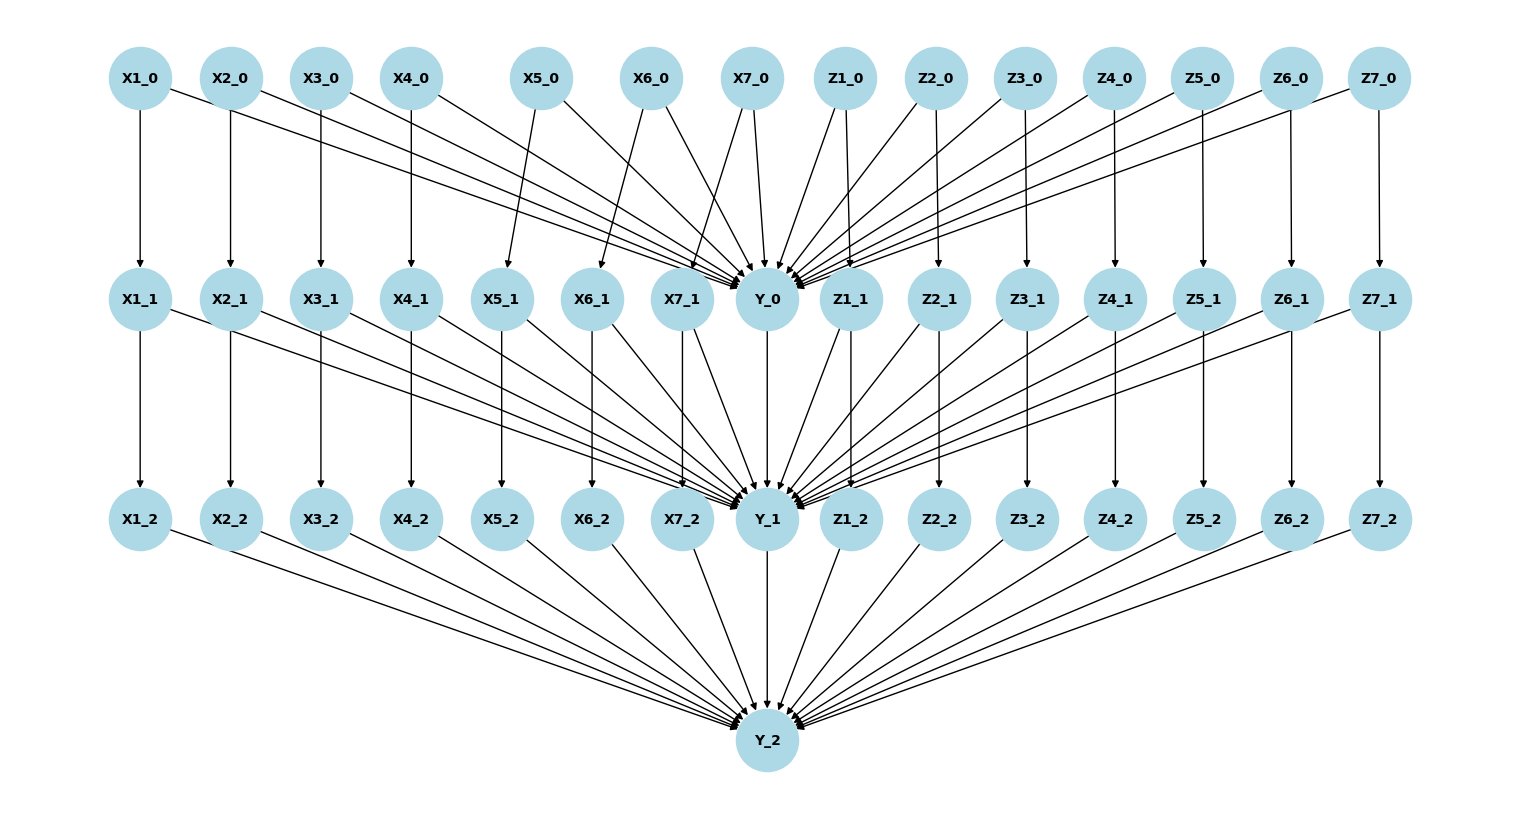

In [13]:
# Run the function
T = 3
init_sem, sem, G, exploration_sets, intervention_domain, true_objective_values, optimal_interventions, all_causal_effects \
= DCG.fifteen_nodes_per_time_steps(T)
# fifteen_nodes_per_time_steps

In [16]:
all_causal_effects

[{('X',): [<tf.Tensor: shape=(), dtype=float32, numpy=-0.00012340981629677117>,
   <tf.Tensor: shape=(), dtype=float32, numpy=-0.00016666579176671803>,
   <tf.Tensor: shape=(), dtype=float32, numpy=-0.0002239377936348319>,
   <tf.Tensor: shape=(), dtype=float32, numpy=-0.0002993594098370522>,
   <tf.Tensor: shape=(), dtype=float32, numpy=-0.00039814639603719115>,
   <tf.Tensor: shape=(), dtype=float32, numpy=-0.0005268384120427072>,
   <tf.Tensor: shape=(), dtype=float32, numpy=-0.0006935788551345468>,
   <tf.Tensor: shape=(), dtype=float32, numpy=-0.0009084467310458422>,
   <tf.Tensor: shape=(), dtype=float32, numpy=-0.0011838231002911925>,
   <tf.Tensor: shape=(), dtype=float32, numpy=-0.0015348262386396527>,
   <tf.Tensor: shape=(), dtype=float32, numpy=-0.0019797736313194036>,
   <tf.Tensor: shape=(), dtype=float32, numpy=-0.002540720161050558>,
   <tf.Tensor: shape=(), dtype=float32, numpy=-0.003244008170440793>,
   <tf.Tensor: shape=(), dtype=float32, numpy=-0.004120901692658663>

In [18]:
# true_objective_values